## Try labels from different experts

In [59]:
import pandas as pd
import numpy as np

ROI_path_JM1 = '../Resources/ROI/JM/1.xlsx'
ROI_path_JM2 = '../Resources/ROI/JM/2.xlsx'

ROI_path_Dan1 = '../Resources/ROI/Dan/1.xlsx'
ROI_path_Dan2 = '../Resources/ROI/Dan/2.xlsx'

ROI_path_Bridget1 = '../Resources/ROI/Bridget/1.xlsx'
ROI_path_Bridget2 = '../Resources/ROI/Bridget/2.xlsx'

roi_CT_JM1 = pd.read_excel(ROI_path_JM1, index_col=[0, 1, 2], header=None)
roi_CT_JM2 = pd.read_excel(ROI_path_JM2, index_col=[0, 1, 2], header=None)

roi_CT_Dan1 = pd.read_excel(ROI_path_Dan1, index_col=[0, 1, 2], header=None)
roi_CT_Dan2 = pd.read_excel(ROI_path_Dan2, index_col=[0, 1, 2], header=None)

roi_CT_Bridget1 = pd.read_excel(ROI_path_Bridget1, index_col=[0, 1, 2], header=None)
roi_CT_Bridget2 = pd.read_excel(ROI_path_Bridget2, index_col=[0, 1, 2], header=None)

In [51]:
index = roi_CT_Bridget1.index

In [67]:
ck_pt = 'SM'
ck_l = 'LLSCC post'

print(roi_CT_JM1.loc[(ck_pt, 'CT',  ck_l)].values.reshape(1,3))
print(roi_CT_JM2.loc[(ck_pt, 'CT', ck_l)].values.reshape(1,3))
print(roi_CT_Dan1.loc[(ck_pt, 'CT',  ck_l)].values.reshape(1,3))
print(roi_CT_Dan2.loc[(ck_pt, 'CT', ck_l)].values.reshape(1,3))
print(roi_CT_Bridget1.loc[(ck_pt, 'CT',  ck_l)].values.reshape(1,3))
print(roi_CT_Bridget2.loc[(ck_pt, 'CT', ck_l)].values.reshape(1,3))

[[753 582 199]]
[[753 582 199]]
[[753 582 199]]
[[753 582 199]]
[[754 584 199]]
[[755 583 198]]


In [60]:
import Functions.MyDataset as MyDataset

names = MyDataset.get_pat_names()

landmarks = ['LLSCC ant', 'LLSCC post', 'RLSCC ant', 'RLSCC post']

all_labels = []

for pt_name in names:
    for landmark in landmarks:
        l1 = roi_CT_JM1.loc[(pt_name, 'CT',  landmark)].values.reshape(1,3)
        l2 = roi_CT_JM2.loc[(pt_name, 'CT',  landmark)].values.reshape(1,3)
        l3 = roi_CT_Dan1.loc[(pt_name, 'CT',  landmark)].values.reshape(1,3)
        l4 = roi_CT_Dan2.loc[(pt_name, 'CT',  landmark)].values.reshape(1,3)
        l5 = roi_CT_Bridget1.loc[(pt_name, 'CT',  landmark)].values.reshape(1,3)
        l6 = roi_CT_Bridget2.loc[(pt_name, 'CT',  landmark)].values.reshape(1,3)
        one_landmark = np.concatenate([l1, l2, l3, l4, l5, l6], axis=0)
        if len(all_labels) == 0:
            all_labels = one_landmark
        else:
            all_labels = np.concatenate([all_labels, one_landmark], axis=0)

In [69]:
all_labels = all_labels.reshape((20, 4, 6, 3))
print(all_labels[19, 1, :, :])

[[753 582 199]
 [753 582 199]
 [753 582 199]
 [753 582 199]
 [754 584 199]
 [755 583 198]]


[[758. 449. 207.]
 [751. 478. 205.]
 [243. 475. 214.]
 [256. 502. 208.]]


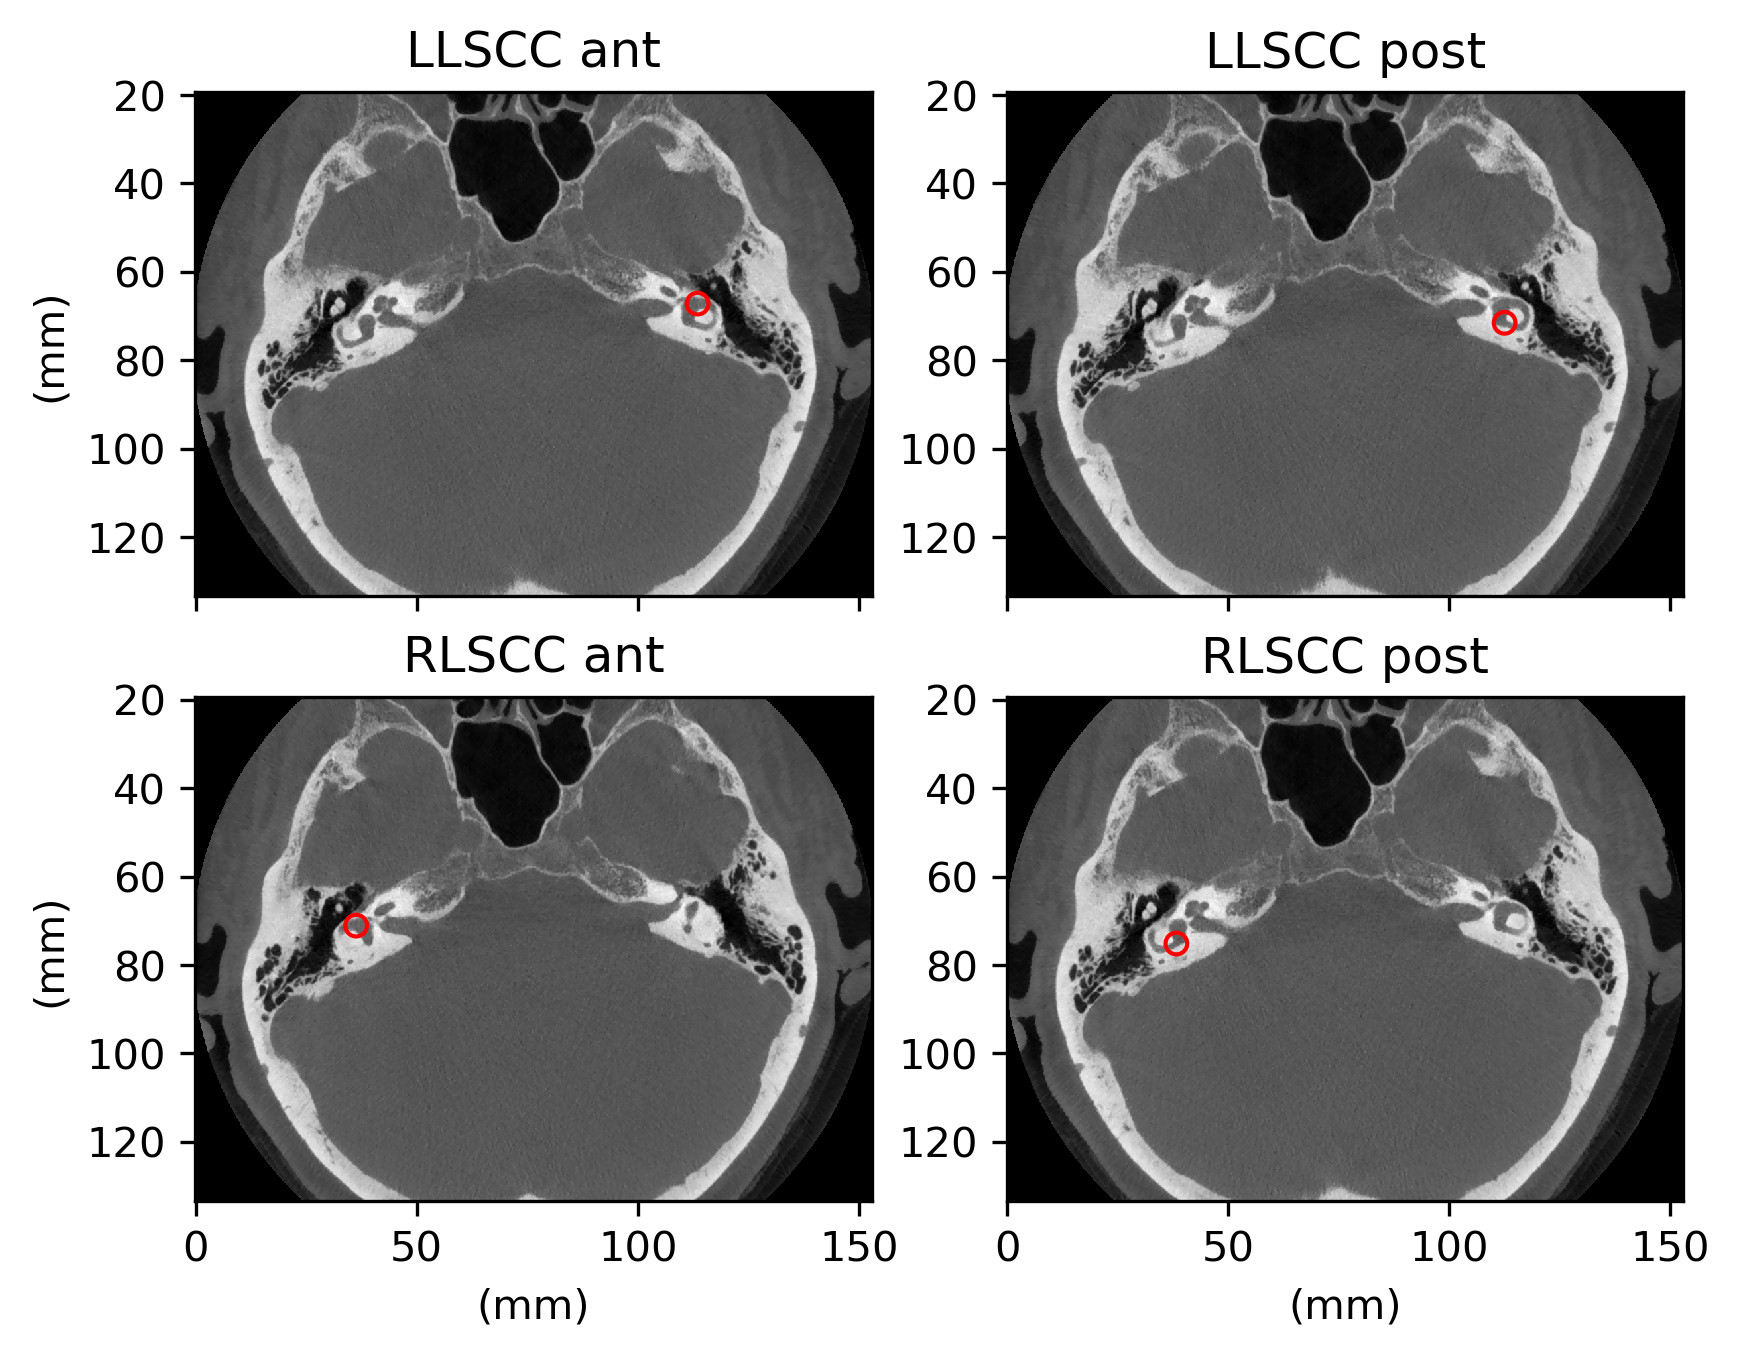

[[758. 449. 207.]
 [751. 478. 205.]
 [243. 475. 214.]
 [256. 502. 208.]]


In [4]:
## Check the cropped results
import numpy as np
import importlib
import Functions.MyDataset as MyDataset
import Functions.Visualization as Visualization

pat_aug_path = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/original_augmentation_data/AH_aug_1.mat"

pixel_space = [0.15, 0.15, 0.15]

importlib.reload(Visualization)

pat_aug_volume, pat_aug_pts, _ = MyDataset.load_mat_data(pat_aug_path)

print(pat_aug_pts)

Visualization.show_pts(pat_aug_volume, pat_aug_pts, pixel_space)

print(pat_aug_pts)